# 3. Detection algorithm: Weight Statistics
... Implementation in numpy

Author: Javier Sales-Ortiz

Important errata: Examples must have 4 or more agents. Otherwise it doesn't work

Date: Nov, 2022

CMPUT 644 Final project

In [1]:
import numpy as np
from partition import *
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

## Questions

* Are the distances calculated with biases or only the weights? Both, treat all parameters the same
* Do it on the weights, not on the updates. But at the end of the dat it can be itnerchangeable

In [30]:
#w1 = np.random.normal(loc =(0,0), scale = 1.0, size=(30, 2)).T
#w2 = np.random.normal(loc =(2,2), scale = 1.0, size=(30, 2)).T
#w3 = np.random.normal(loc =(-2,2), scale = 1.0, size=(30, 2)).T
#w4 = np.random.normal(loc =(10,10), scale = 1.0, size=(30, 2)).T
w1 = np.array([0.5,0.5])
w2 = np.array([1,1])
w3 = np.array([0.2,1])
w4 = np.array([0.2,0.2])
w5 = np.array([0.2,0.4])
w6 = np.array([0.3,1])
w7 = np.array([1,0.3])
w8 = np.array([0.4,0.2])
w9 = np.array([1,0.5])
w10 = np.array([-4,4])
WL = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10]
print(w1.shape, w2.shape)


(2,) (2,)


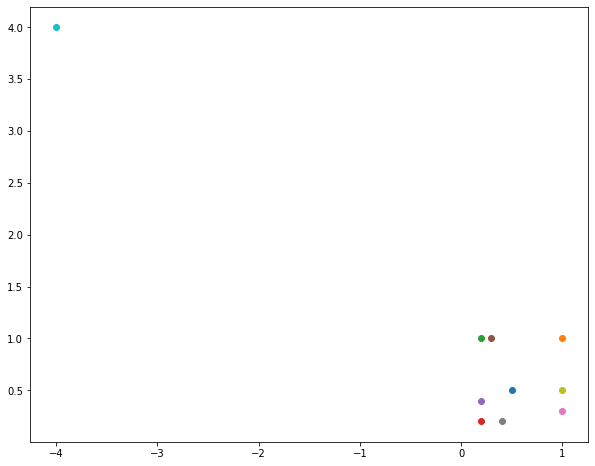

In [31]:
fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.add_subplot(1,1,1)

for w in WL:
    ax1.scatter(w[0], w[1])

1. For the malicious agent we compute:

$R_m = [\min_{i \in [k] \backslash m} d(\mathbb{\delta}_m^t, \mathbb{\delta}_i^t), \max_{i \in [k] \backslash m} d(\mathbb{\delta}_m^t, \mathbb{\delta}_i^t)]$

2. Define values:

$R_{\min,[k] \backslash m}^l$ The minimum lower bound of the range for all other agents

$R_{\max,[k] \backslash m}^u$ The maximum upper bound of the range for all other agents

3. For the malicious agent not to be flagged, we need:

$\max \{|R_m^u-R_{min, [k] \backslash m}^l|, |R_{m}^l - R_{max, [k]\backslash m}^u| \} < \kappa_t$

I have observed that 3. doesn't work, so my proposed fix is:

$\max \{|R_m^l-R_{min, [k] \backslash m}^l|, |R_{m}^u - R_{max, [k]\backslash m}^u| \} < \kappa_t$

In [34]:
weight_update_statistics(WL, fix= True, debug=True)

[[   nan 0.7071 0.5831 0.4243 0.3162 0.5385 0.5385 0.3162 0.5    5.7009]
 [0.7071    nan 0.8    1.1314 1.     0.7    0.7    1.     0.5    5.831 ]
 [0.5831 0.8       nan 0.8    0.6    0.1    1.063  0.8246 0.9434 5.1614]
 [0.4243 1.1314 0.8       nan 0.2    0.8062 0.8062 0.2    0.8544 5.6639]
 [0.3162 1.     0.6    0.2       nan 0.6083 0.8062 0.2828 0.8062 5.5317]
 [0.5385 0.7    0.1    0.8062 0.6083    nan 0.9899 0.8062 0.8602 5.2431]
 [0.5385 0.7    1.063  0.8062 0.8062 0.9899    nan 0.6083 0.2    6.2201]
 [0.3162 1.     0.8246 0.2    0.2828 0.8062 0.6083    nan 0.6708 5.8138]
 [0.5    0.5    0.9434 0.8544 0.8062 0.8602 0.2    0.6708    nan 6.1033]
 [5.7009 5.831  5.1614 5.6639 5.5317 5.2431 6.2201 5.8138 6.1033    nan]]
Agent 0: Rm [0.32, 5.70], R_k\m [0.10, 6.22], [|R(l,m)-R(l,k\m)|, |R(u,m)-R(u,k\m)|] = 0.22, 0.52
Agent 1: Rm [0.50, 5.83], R_k\m [0.10, 6.22], [|R(l,m)-R(l,k\m)|, |R(u,m)-R(u,k\m)|] = 0.40, 0.39
Agent 2: Rm [0.10, 5.16], R_k\m [0.20, 6.22], [|R(l,m)-R(l,k\m)|, |R(u,m)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])